<a href="https://colab.research.google.com/github/SurekhaBerlin/Credit-Card-Fraud-Prediction-using-ML/blob/main/Credit_Card_Fraud_Prediction_using_ML_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57531 entries, 0 to 57530
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57531 non-null  int64  
 1   V1      57531 non-null  float64
 2   V2      57531 non-null  float64
 3   V3      57531 non-null  float64
 4   V4      57531 non-null  float64
 5   V5      57530 non-null  float64
 6   V6      57530 non-null  float64
 7   V7      57530 non-null  float64
 8   V8      57530 non-null  float64
 9   V9      57530 non-null  float64
 10  V10     57530 non-null  float64
 11  V11     57530 non-null  float64
 12  V12     57530 non-null  float64
 13  V13     57530 non-null  float64
 14  V14     57530 non-null  float64
 15  V15     57530 non-null  float64
 16  V16     57530 non-null  float64
 17  V17     57530 non-null  float64
 18  V18     57530 non-null  float64
 19  V19     57530 non-null  float64
 20  V20     57530 non-null  float64
 21  V21     57530 non-null  float64
 22

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57531.000000,57531.000000,57531.000000,57531.000000,57531.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,...,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000
mean,31174.497036,-0.238428,-0.008003,0.690217,0.171634,-0.259999,0.102886,-0.117290,0.056047,0.072816,...,-0.027627,-0.106286,-0.039311,0.007152,0.136122,0.019951,0.003049,0.003816,94.962293,0.002764
std,13539.038696,1.866750,1.643754,1.456780,1.387928,1.399214,1.309931,1.257196,1.195360,1.188572,...,0.724830,0.636313,0.593646,0.596662,0.438116,0.499105,0.385182,0.324382,258.751582,0.052499
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,25507.000000,-0.994263,-0.581955,0.207691,-0.727949,-0.877906,-0.635432,-0.606257,-0.145380,-0.642709,...,-0.228755,-0.526347,-0.180006,-0.324593,-0.127942,-0.330253,-0.063536,-0.006459,7.680000,0.000000
50%,35149.000000,-0.244696,0.074661,0.783055,0.182391,-0.293590,-0.152452,-0.075688,0.061320,-0.032749,...,-0.063960,-0.080801,-0.051994,0.062228,0.174801,-0.075565,0.008744,0.022469,25.990000,0.000000
75%,41392.500000,1.155070,0.731609,1.417419,1.054230,0.279316,0.491946,0.424691,0.335839,0.751398,...,0.112220,0.308579,0.078774,0.402531,0.422282,0.297036,0.082397,0.076176,87.440000,0.000000
max,47946.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,1
V6,1
V7,1
V8,1
V9,1


In [8]:
df.duplicated().sum()

239

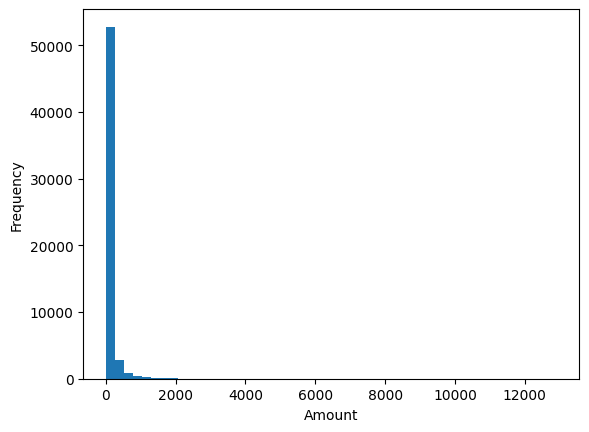

In [11]:
# Plot the histogram of the data
plt.hist(df['Amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

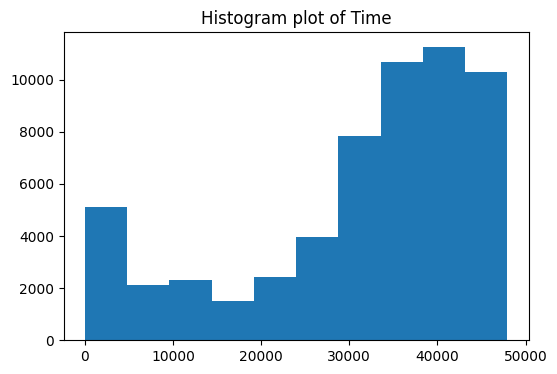

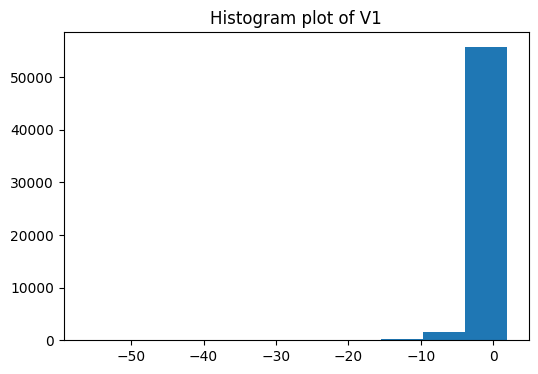

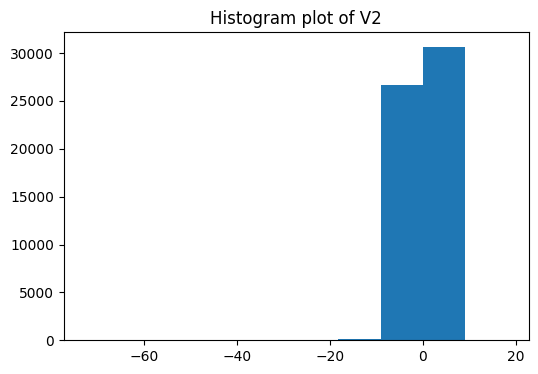

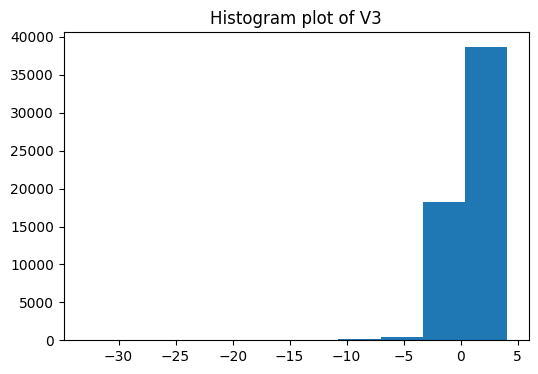

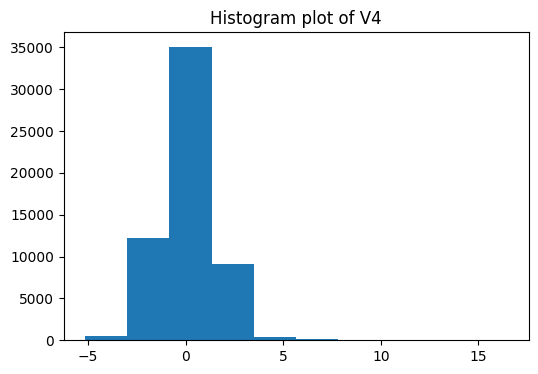

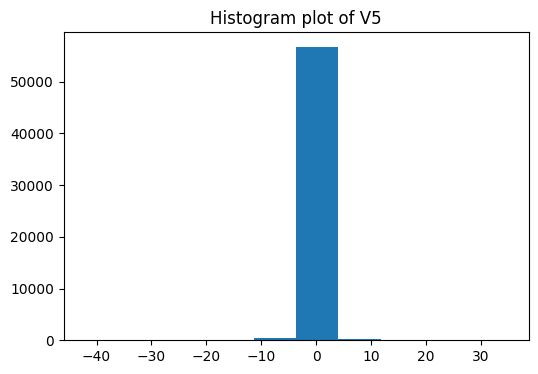

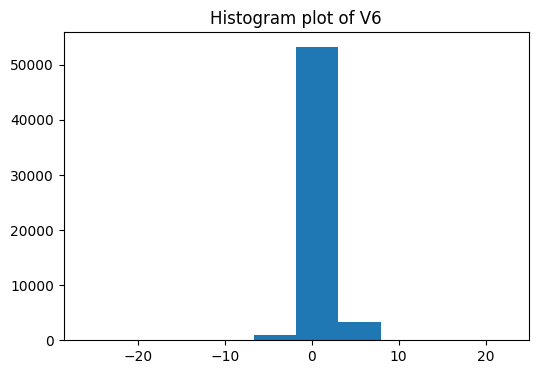

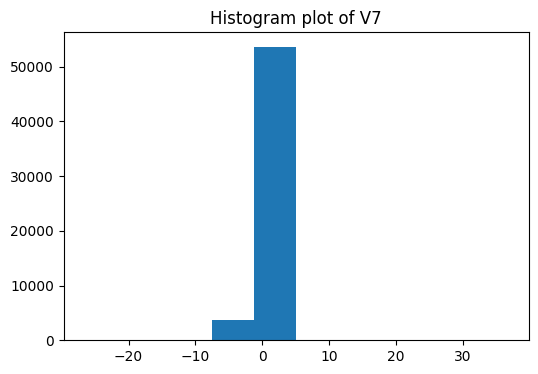

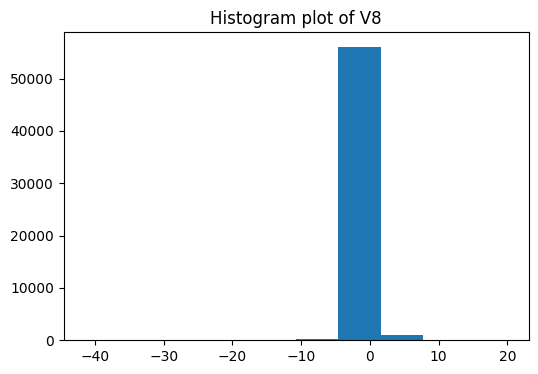

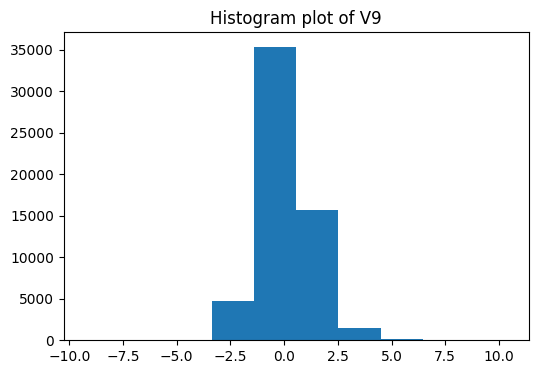

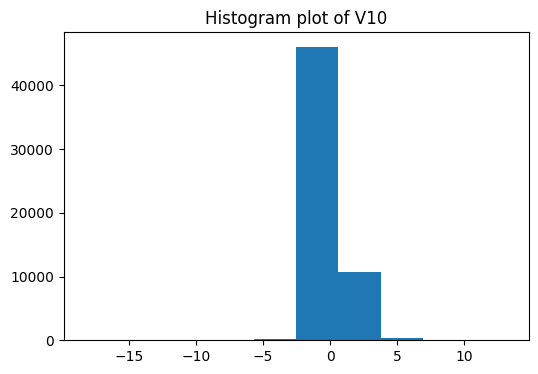

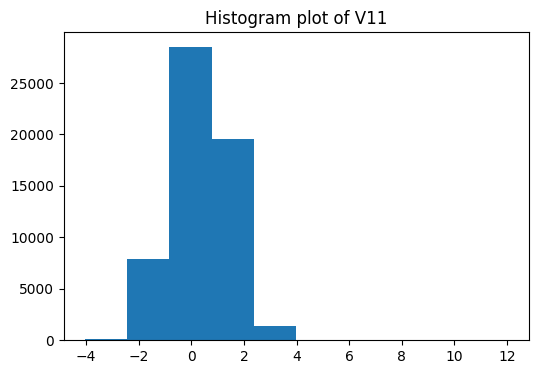

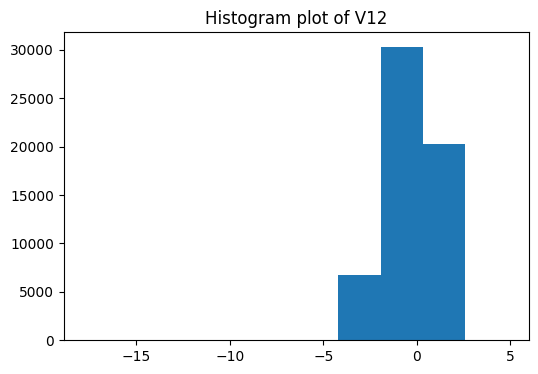

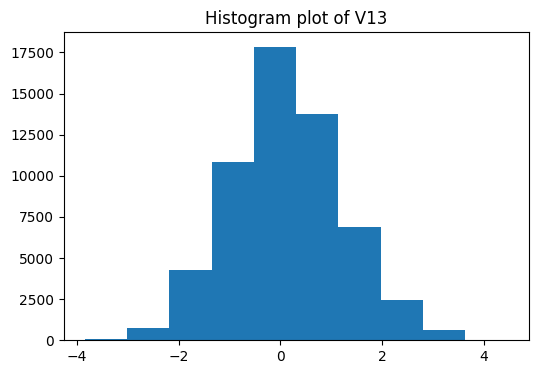

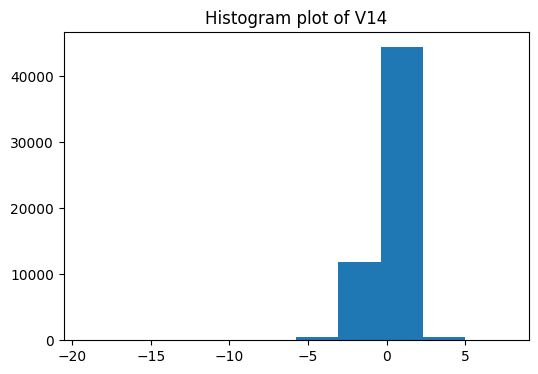

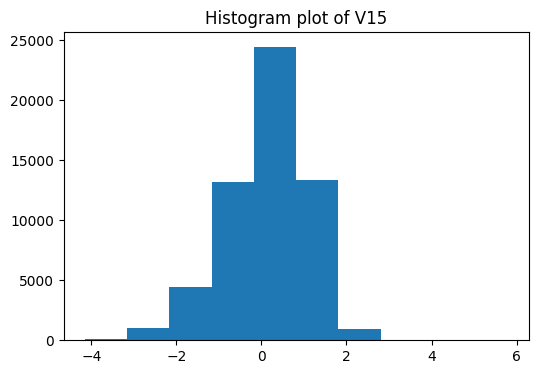

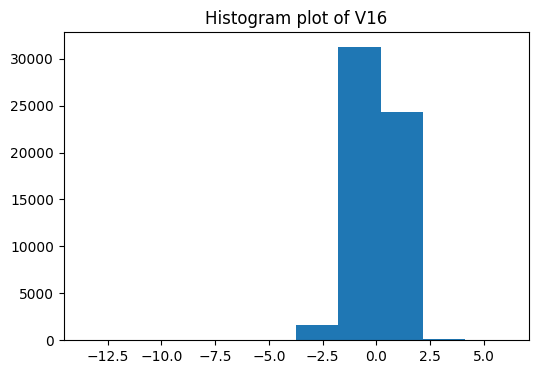

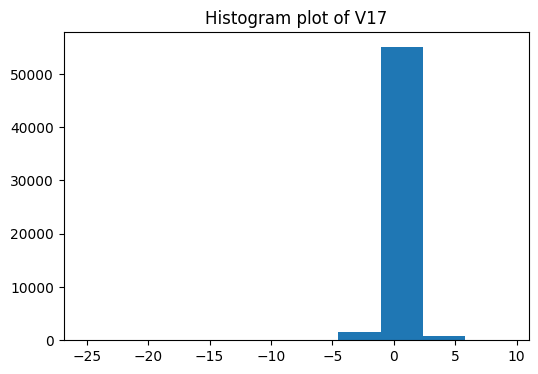

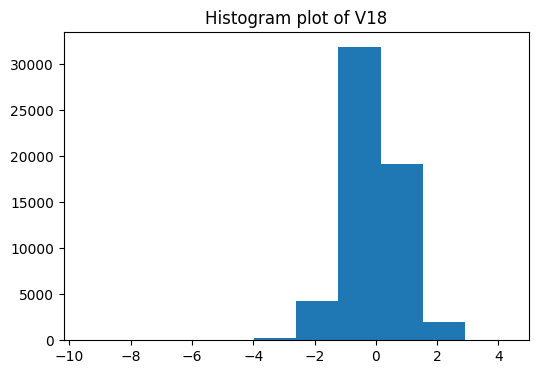

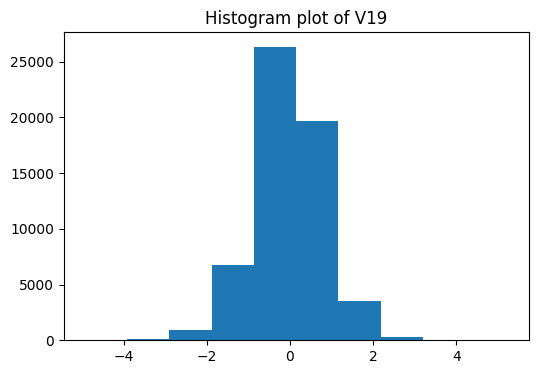

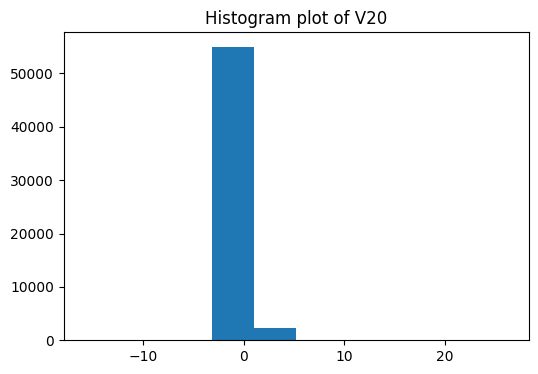

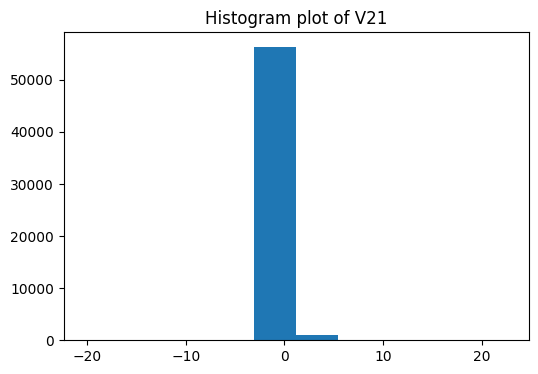

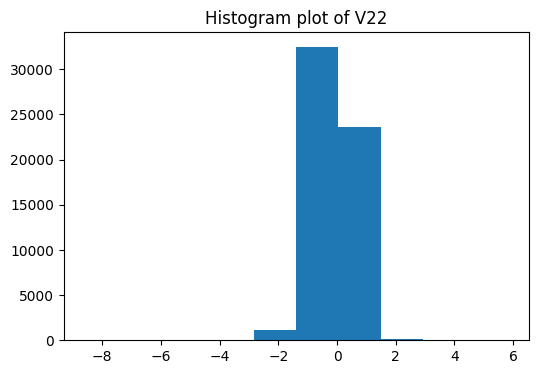

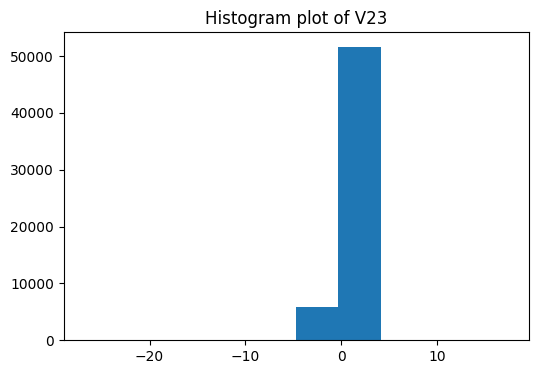

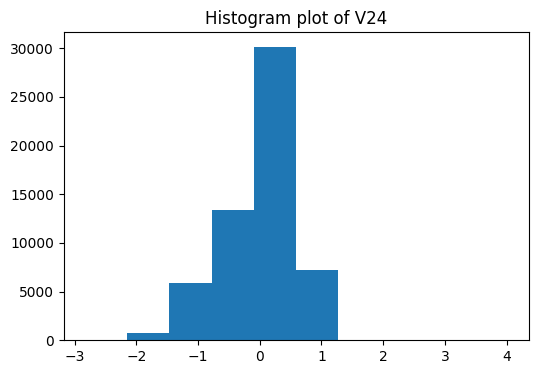

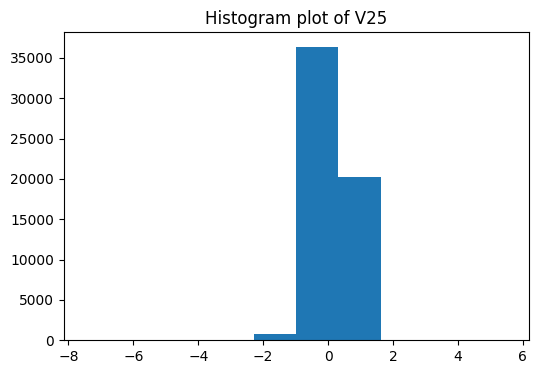

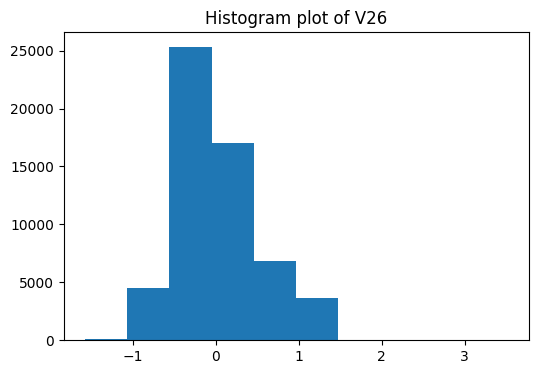

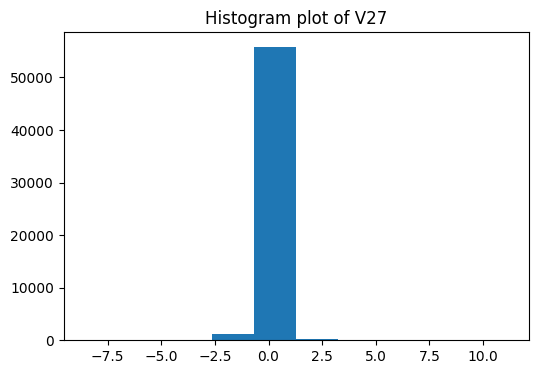

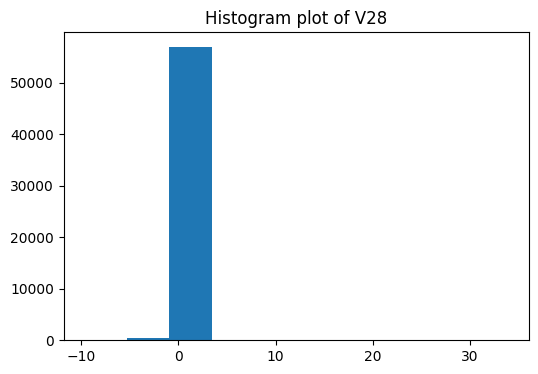

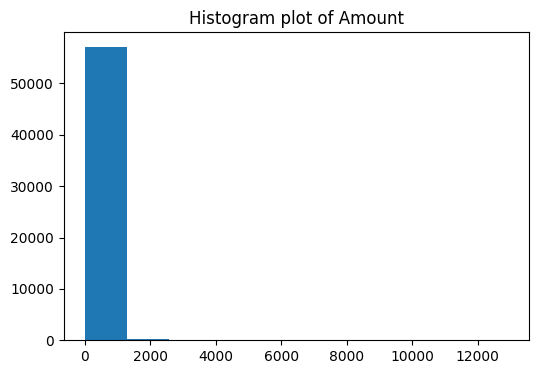

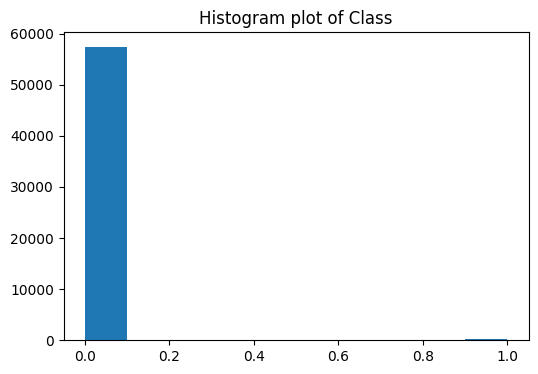

In [21]:
# Plot the histogram or box plot to find the outlier of all the  column
# Loop through all columns in the DataFrame and plot a box plot for each
for column in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column])
    plt.title(f'Histogram plot of {column}')
    plt.show()